### Employment from Statistics Canada
Data downloaded from https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410038702  
Data from 2006 - ongoing

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import plotly.graph_objects as go
import numpy as np

In [3]:
### Download latest table

import requests, zipfile, io
r = requests.get("https://www150.statcan.gc.ca/n1/tbl/csv/14100387-eng.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall(f"../data/raw")

In [5]:
## Read original source Labor Force Survey 
data = pd.read_csv(f'../data/raw/14100387.csv')

/Users/angel/opt/anaconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
data.head()

,REF_DATE,GEO,DGUID,Labour force characteristics,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2006-03,Canada,2016A000011124,Population,Estimate,Persons,249,thousands,3,v1235063379,1.1.1,25979.9,NaN,NaN,NaN,1
1,2006-03,Canada,2016A000011124,Labour force,Estimate,Persons,249,thousands,3,v1235063380,1.2.1,17124.8,NaN,NaN,NaN,1
2,2006-03,Canada,2016A000011124,Labour force,Standard error of estimate,Persons,249,thousands,3,v1235063381,1.2.2,36.6,NaN,NaN,NaN,1
3,2006-03,Canada,2016A000011124,Labour force,Standard error of year-over-year change,Persons,249,thousands,3,v1235063382,1.2.3,NaN,..,NaN,NaN,1
4,2006-03,Canada,2016A000011124,Employment,Estimate,Persons,249,thousands,3,v1235063383,1.3.1,15943.7,NaN,NaN,NaN,1


In [7]:
data['REF_DATE'].unique()

array(['2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08',
       '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02',
       '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08',
       '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02',
       '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08',
       '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02',
       '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08',
       '2009-09', '2009-10', '2009-11', '2009-12', '2010-01', '2010-02',
       '2010-03', '2010-04', '2010-05', '2010-06', '2010-07', '2010-08',
       '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02',
       '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08',
       '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-02',
       '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08',
       '2012-09', '2012-10', '2012-11', '2012-12', 

In [8]:
### Select only data for Bristish Columbia
data = data[(data.GEO.isin(['British Columbia',
       'Vancouver Island and Coast, British Columbia',
       'Lower Mainland-Southwest, British Columbia',
       'Thompson-Okanagan, British Columbia',
       'Kootenay, British Columbia', 'Cariboo, British Columbia',
       'North Coast and Nechako, British Columbia',
       'Northeast, British Columbia'])) & (data.Statistics == 'Estimate')]

In [9]:
data.GEO.unique()

array(['British Columbia', 'Vancouver Island and Coast, British Columbia',
       'Lower Mainland-Southwest, British Columbia',
       'Thompson-Okanagan, British Columbia',
       'Kootenay, British Columbia', 'Cariboo, British Columbia',
       'North Coast and Nechako, British Columbia',
       'Northeast, British Columbia'], dtype=object)

In [10]:
data['Labour force characteristics'].unique()

array(['Population', 'Labour force', 'Employment', 'Full-time employment',
       'Part-time employment', 'Unemployment', 'Not in labour force',
       'Unemployment rate', 'Participation rate', 'Employment rate'],
      dtype=object)

In [11]:
data.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Labour force characteristics',
       'Statistics', 'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR',
       'COORDINATE', 'VALUE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [12]:
## Select only useful columns
data = data[['REF_DATE', 'GEO','Labour force characteristics','UOM','SCALAR_FACTOR','VALUE']]

In [13]:
data.head()

,REF_DATE,GEO,Labour force characteristics,UOM,SCALAR_FACTOR,VALUE
1904,2006-03,British Columbia,Population,Persons,thousands,3422.1
1905,2006-03,British Columbia,Labour force,Persons,thousands,2205.4
1908,2006-03,British Columbia,Employment,Persons,thousands,2092.2
1911,2006-03,British Columbia,Full-time employment,Persons,thousands,1640.2
1914,2006-03,British Columbia,Part-time employment,Persons,thousands,452.0


In [14]:
### Keep only data from 2016 onwards
data = data[pd.DatetimeIndex(data['REF_DATE']).year > 2015]

In [15]:
data.GEO.unique()

array(['British Columbia', 'Vancouver Island and Coast, British Columbia',
       'Lower Mainland-Southwest, British Columbia',
       'Thompson-Okanagan, British Columbia',
       'Kootenay, British Columbia', 'Cariboo, British Columbia',
       'North Coast and Nechako, British Columbia',
       'Northeast, British Columbia'], dtype=object)

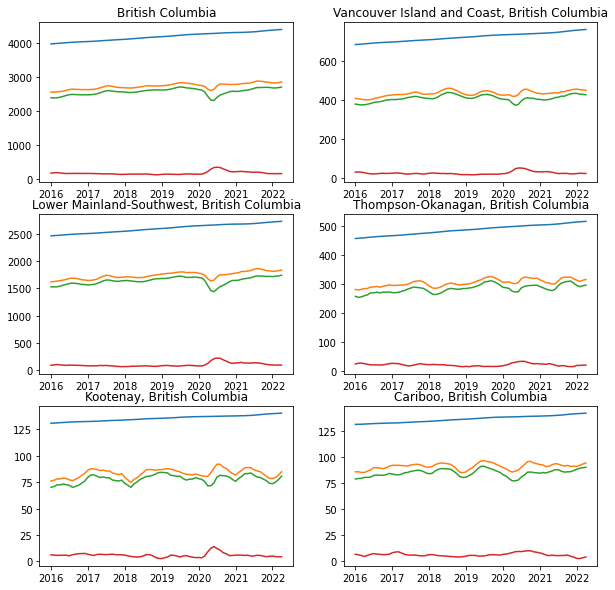

In [16]:
## Sneak peak into data
variables = ['Population','Labour force','Employment','Unemployment']

fig,axes = plt.subplots(3,2,figsize = (10,10))
for a,ax in enumerate(axes.flatten()):
    df = data[(data['GEO'] == data.GEO.unique()[a])]
    for variable in variables:
        ax.plot(pd.DatetimeIndex(df[df['Labour force characteristics'] == variable]['REF_DATE']),df[df['Labour force characteristics'] == variable]['VALUE'])
        ax.set_title(f'{data.GEO.unique()[a]}')

In [17]:
## Replace Economic Region names with corresponding Tourism Regions
correspondence = {'British Columbia':'British Columbia',
                  'Vancouver Island and Coast, British Columbia': 'Vancouver Island',
                  'Lower Mainland-Southwest, British Columbia':'Vancouver Coast and Mountains',
                  'Thompson-Okanagan, British Columbia':  'Thompson-Okanagan',
                  'Kootenay, British Columbia': 'Kootenay Rockies', 
                  'Cariboo, British Columbia':'Cariboo Chilcotin Coast',
                  'North Coast and Nechako, British Columbia':'Northern British Columbia',
                  'Northeast, British Columbia':'Northern British Columbia'}

In [18]:
data['Tourism_region'] =data['GEO']

In [19]:
data.replace({'Tourism_region':correspondence}, inplace=True)

In [20]:
data.columns

Index(['REF_DATE', 'GEO', 'Labour force characteristics', 'UOM',
       'SCALAR_FACTOR', 'VALUE', 'Tourism_region'],
      dtype='object')

In [21]:
## Get values in appropriate units
data_count = data[data['Labour force characteristics'].isin(['Population','Labour force','Employment','Unemployment'])].copy()
#data_count = data_count.groupby(['Tourism_region','REF_DATE','Labour force characteristics']).sum().reset_index()
data_count['VALUE']= data_count['VALUE']*1000

In [22]:
data_per = data[data['Labour force characteristics'].isin(['Employment rate','Unemployment rate'])].copy()
#data_per = data_per.groupby(['Tourism_region','REF_DATE','Labour force characteristics']).mean().reset_index()

In [23]:
df = data_count.append(data_per)

In [24]:
### Format data with data model for database
df.rename(columns={'REF_DATE':'date',
                   'GEO':'category_2',
                   'Tourism_region':'region',
                   'VALUE':'value',
                   'Labour force characteristics':'indicator_code'}, inplace=True)

In [25]:
df['category_1']=np.nan

In [26]:
df = df[['indicator_code','date','region','category_1','category_2','value']]

In [27]:
## Set indicator names
indicator_names = {'Population':'population_by_economic_region',
                  'Labour force': 'labour_force_by_economic_region',
                  'Employment':'total_employment_by_economic_region',
                  'Unemployment':  'total_unemployment_by_economic_region',
                  'Employment rate':'total_employment_rate_by_economic_region',
                  'Unemployment rate':'total_unemployment_rate_by_economic_region'}

In [28]:
df.replace({'indicator_code':indicator_names}, inplace=True)

In [29]:
### delete 'British Columbia tag'
## Replace Economic Region names with corresponding Tourism Regions
correspondence = {'British Columbia':'British Columbia',
                  'Vancouver Island and Coast, British Columbia': 'Vancouver Island and Coast',
                  'Lower Mainland-Southwest, British Columbia':'Lower Mainland-Southwest',
                  'Thompson-Okanagan, British Columbia':  'Thompson-Okanagan',
                  'Kootenay, British Columbia': 'Kootenay', 
                  'Cariboo, British Columbia':'Cariboo',
                  'North Coast and Nechako, British Columbia':'North Coast and Nechako',
                  'Northeast, British Columbia':'Northeast'}

In [30]:
df.replace({'category_2':correspondence}, inplace=True)

In [33]:
df.sort_values(by=['indicator_code','date']).to_csv(f'../data/processed/Labour_Force_Survey_2016_2022.csv')